In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from dowhy import CausalModel
import dowhy.datasets

from causalbenchmark.graphs import create_graph
from causalbenchmark import util

ImportError: cannot import name ci_relation_check
nonsense_story.csv saved to /is/ei/fleeb/workspace/code/projects/causalbenchmark/causalbenchmark/verbal/nonsense_story.csv


In [2]:
scm = create_graph('frontdoor')
# scm = create_graph('IV')
g = scm.to_networkx()
gml = '\n'.join(nx.generate_gml(g))

In [77]:
pg = scm.as_pom()

pomegranate.BayesianNetwork.BayesianNetwork

In [80]:
len(g)

In [79]:
pg.probability?

In [82]:
combos = util.generate_all_bit_strings(len(g))
combos.shape

In [9]:
scm.probability(X=1, Y=1) / scm.probability(X=1)

In [10]:
scm.probability(X=0, Y=1) / scm.probability(X=0)

In [8]:
scm.marginals(X=1)['Y']

In [11]:
scm.marginals(X=0)['Y']

In [86]:
pg.probability(X=1)#.sum()

TypeError: probability() takes no keyword arguments

In [58]:
# I. Create a causal model from the data and given graph.

df = pd.DataFrame(np.random.randn(10, len(g.nodes)), columns = list(g.nodes))

model = CausalModel(
    data = df,
    # data=data["df"],
    treatment=['X'],
    outcome=['Y'],
    graph=gml)

# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()


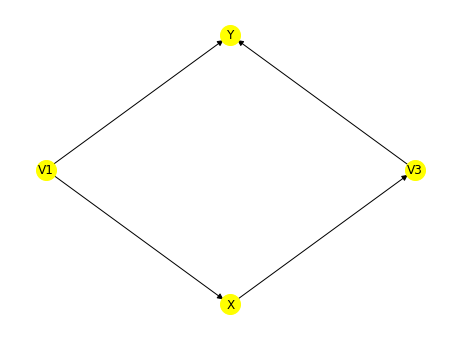

In [59]:
model.view_model()

In [60]:
est = identified_estimand

In [61]:
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d           
────(E[Y|V1])
d[X]         
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,V1,U) = P(Y|X,V1)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡  d       d        ⎤
E⎢─────(Y)⋅────([V₃])⎥
 ⎣d[V₃]    d[X]      ⎦
Estimand assumption 1, Full-mediation: V3 intercepts (blocks) all directed paths from X to Y.
Estimand assumption 2, First-stage-unconfoundedness: If U→{X} and U→{V3} then P(V3|X,U) = P(V3|X)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{V3} and U→Y then P(Y|V3, X, U) = P(Y|V3, X)



In [62]:
exp = est.estimands['backdoor1']['estimand']
exp

 d           
────(E[Y|V1])
d[X]         

In [74]:
exp.args[0]

In [63]:
identified_estimand_nde = model.identify_effect(estimand_type="nonparametric-nde",
                                            proceed_when_unidentifiable=True)
print(identified_estimand_nde)

Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡ d        ⎤
E⎢────(Y|V3)⎥
 ⎣d[X]      ⎦
Estimand assumption 1, Mediation: V3 intercepts (blocks) all directed paths from X to Y except the path {X}→{Y}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{X} and U→{V3} then P(V3|X,U) = P(V3|X)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{V3} and U→Y then P(Y|V3, X, U) = P(Y|V3, X)



In [64]:
identified_estimand_nie = model.identify_effect(estimand_type="nonparametric-nie",
                                            proceed_when_unidentifiable=True)
print(identified_estimand_nie)

Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d       d        ⎤
E⎢─────(Y)⋅────([V₃])⎥
 ⎣d[V₃]    d[X]      ⎦
Estimand assumption 1, Mediation: V3 intercepts (blocks) all directed paths from X to Y except the path {X}→{Y}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{X} and U→{V3} then P(V3|X,U) = P(V3|X)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{V3} and U→Y then P(Y|V3, X, U) = P(Y|V3, X)



In [65]:
identified_estimand_cde = model.identify_effect(estimand_type="nonparametric-cde",
                                            proceed_when_unidentifiable=True)
print(identified_estimand_cde)

Estimand type: EstimandType.NONPARAMETRIC_CDE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d              
────(E[Y|V3,V1])
d[X]            
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,V3,V1,U) = P(Y|X,V3,V1)



In [ ]:
import cvxpy as cp

# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

# The optimal dual variable (Lagrange multiplier) for
# a constraint is stored in constraint.dual_value.
print("optimal (x + y == 1) dual variable", constraints[0].dual_value)
print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
print("x - y value:", (x - y).value)

In [1]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial quadratic program.
m = 15
n = 10
p = 5
np.random.seed(1)
P = np.random.randn(n, n)
P = P.T @ P
q = np.random.randn(n)
G = np.random.randn(m, n)
h = G @ np.random.randn(n)
A = np.random.randn(p, n)
b = np.random.randn(p)

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T @ x),
                 [G @ x <= h,
                  A @ x == b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)


The optimal value is 86.891415855699
A solution x is
[-1.68244521  0.29769913 -2.38772183 -2.79986015  1.18270433 -0.20911897
 -4.50993526  3.76683701 -0.45770675 -3.78589638]
A dual solution corresponding to the inequality constraints is
[ 0.          0.          0.          0.          0.         10.45538054
  0.          0.          0.         39.67365045  0.          0.
  0.         20.79927156  6.54115873]


In [2]:
n = 7

x = cp.Variable(n)

In [5]:
P = np.zeros((n,n))
P[2,6] = 1
P[2,4] = -1
P[1,5] = -1
P[1,3] = 1

q = np.zeros(n)
q[4] = 1
q[3] = -1

mx = np.ones(n)
mn = np.zeros(n)

m = 4

A = np.zeros((m,n))

A[0,0] = -1
A[1,5] = 1
A[1,3] = -1
A[2,4] = 1
A[2,6] = -1

b = np.zeros(m)
b[0] = -0.1


In [7]:
prob = cp.Problem(cp.Minimize(x.T @ P @ x + q.T @ x),
                 [x <= mx, x >= mn,
                  A @ x > b])

prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)

ValueError: Quadratic form matrices must be symmetric/Hermitian.

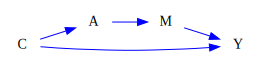

In [23]:
# imports for this notebook

from ananke import graphs
from ananke import identification

vertices = ['A', 'M', 'Y', 'C']
edges = [('A', 'M'), ('M', 'Y'), ('C', 'A'), ('C', 'Y')]
dag = graphs.DAG(vertices, edges)
# the direction LR is just to lay the vertices of the graph out from left to right
# instead of top to bottom which is the default
dag.draw(direction='LR')

In [26]:
identification.get_opt_set(dag, 'A', 'Y')

In [28]:
identification

{'C'}

In [31]:
outcomes = ['Y']
treatments = ['A']
id_pya = identification.OneLineID(graph=dag, treatments=treatments, outcomes=outcomes)
print('Identifed =', id_pya.id(), '; Functional =', id_pya.functional())

{('M',): ['A', 'Y', 'C'], ('Y',): ['M', 'A', 'C'], ('C',): ['M', 'A', 'Y']}
Identifed = True ; Functional = ΣMC ΦYAM(p(V);G) ΦCYA(p(V);G) ΦCAM(p(V);G) 


In [33]:
id_pya.functional()

{('M',): ['A', 'Y', 'C'], ('Y',): ['M', 'A', 'C'], ('C',): ['M', 'A', 'Y']}


'ΣMC ΦYAM(p(V);G) ΦCYA(p(V);G) ΦCAM(p(V);G) '